In [ ]:
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.votable import parse
from astropy.table import Table
import numpy as np
from scipy.stats import skew, kurtosis
from astropy.timeseries import LombScargle

In [1]:
# Initialize SIMBAD and Vizier
simbad = Simbad()
vizier = Vizier()

# Function to query a cluster and get a VOTable
def query_cluster(cluster_name, radius_arcmin):
    # Query SIMBAD for the cluster coordinates
    result_table = simbad.query_object(cluster_name)
    ra = result_table['RA'][0]
    dec = result_table['DEC'][0]
    coord = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

    # Query Vizier for objects within the radius around the cluster center
    result = vizier.query_region(coord, radius=radius_arcmin*u.arcmin, catalog="I/345/gaia2")

    # Extract VOTable
    votable = result['I/345/gaia2']
    return votable

# Function to calculate absolute magnitude
def calculate_absolute_magnitude(app_mag, parallax):
    distance_pc = 1000 / parallax  # parallax is in milliarcseconds
    abs_mag = app_mag - 5 * (np.log10(distance_pc) - 1)
    return abs_mag

# Function to estimate luminosity
def estimate_luminosity(abs_mag):
    sun_abs_mag = 4.83
    luminosity = 10 ** ((sun_abs_mag - abs_mag) / 2.5)
    return luminosity

# Function to estimate temperature
def estimate_temperature(b_v):
    # Using Ballesteros' formula to estimate temperature from B-V color index
    temperature = 4600 * (1 / (0.92 * b_v + 1.7) + 1 / (0.92 * b_v + 0.62))
    return temperature

def vot(Name,radius):
# Query the clusters
    votable = query_cluster(Name, radius)  # 120 arcmin radius
    
# Save the VOTables to files
    votable.write(f'{Name}.vot', format='votable',overwrite=True)

# Read the VOTABLE files
    votable_= parse(f"{Name}.vot")

# Convert the VOTABLE to an Astropy table
    table = votable_.get_first_table().to_table(use_names_over_ids=True)

# Extract required columns
    b_v = table['BPmag'] - table['RPmag']
    app_mag = table['Gmag']
    parallax = table['Plx']


# Calculate absolute magnitude
    abs_mag = calculate_absolute_magnitude(app_mag, parallax)

# Estimate luminosity and temperature
    luminosity = estimate_luminosity(abs_mag)
    temperature = estimate_temperature(b_v)

    return temperature, luminosity,abs_mag,b_v

def plot_HR(x,y,Name):
    # Plot HR diagram (Temperature vs Luminosity)
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y, label=Name)
    plt.gca().invert_xaxis()
    plt.yscale('log')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Luminosity (L/Lsun)')
    plt.title(f'Hertzsprung-Russell Diagram for {Name}')
    plt.legend()

def plot_CM(x,y,Name):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='r', label=Name)
    plt.gca().invert_yaxis()
    plt.xlabel('B-V Color Index')     
    plt.ylabel('Absolute Magnitude (M)')
    plt.title(f'Color-Magnitude Diagram of {Name}')
    plt.legend()


/tmp/ipykernel_38906/630419250.py:34: RuntimeWarning: invalid value encountered in log10
  abs_mag = app_mag - 5 * (np.log10(distance_pc) - 1)
/tmp/ipykernel_38906/630419250.py:34: RuntimeWarning: invalid value encountered in log10
  abs_mag = app_mag - 5 * (np.log10(distance_pc) - 1)


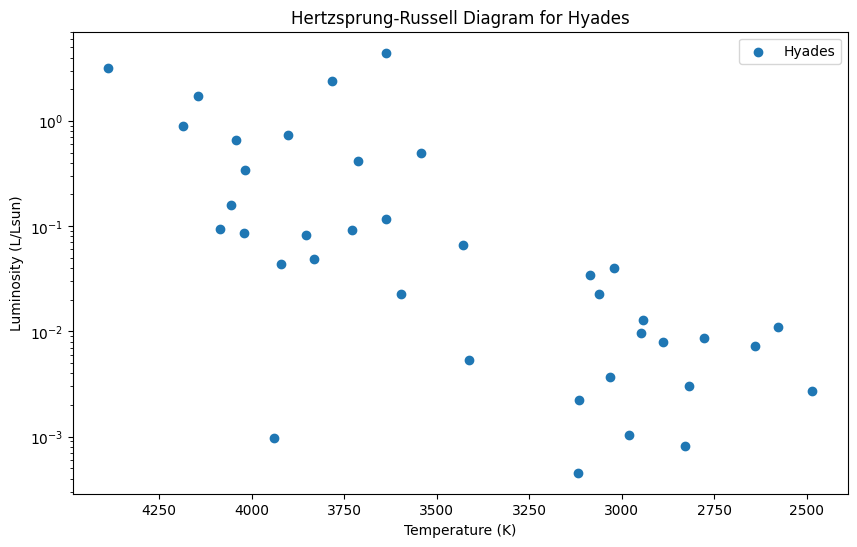

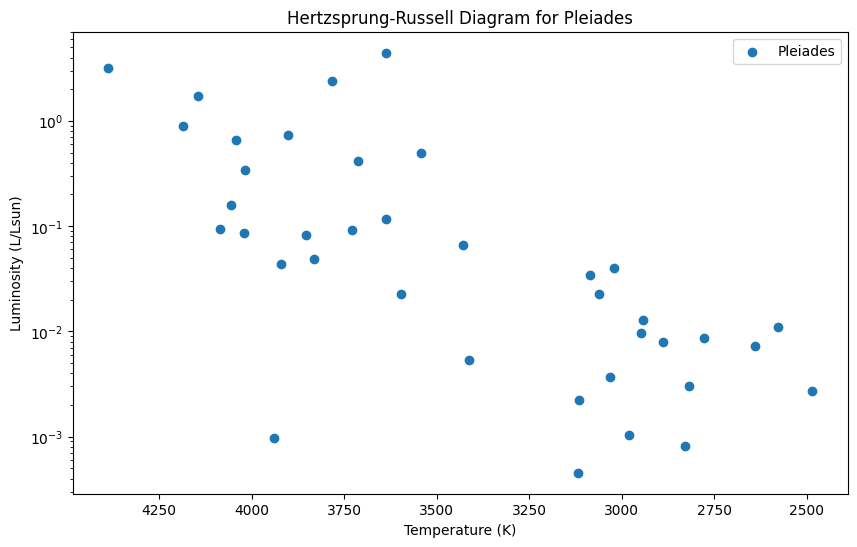

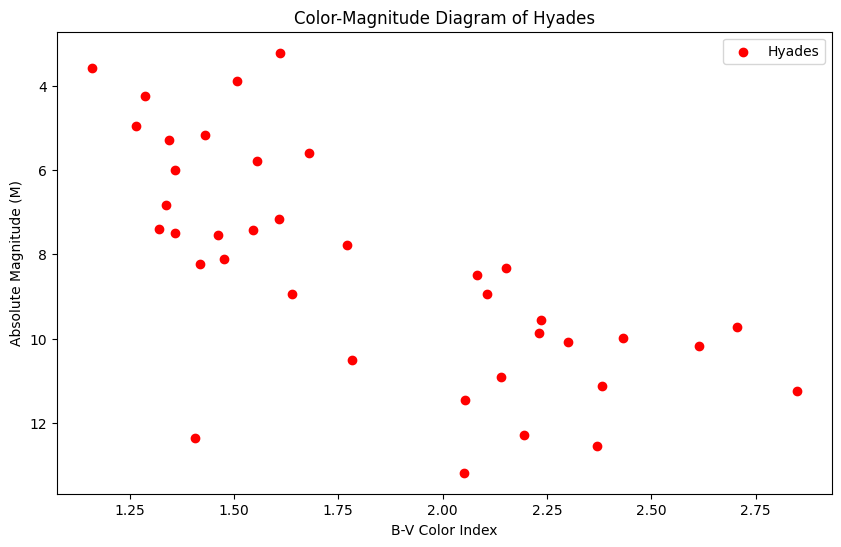

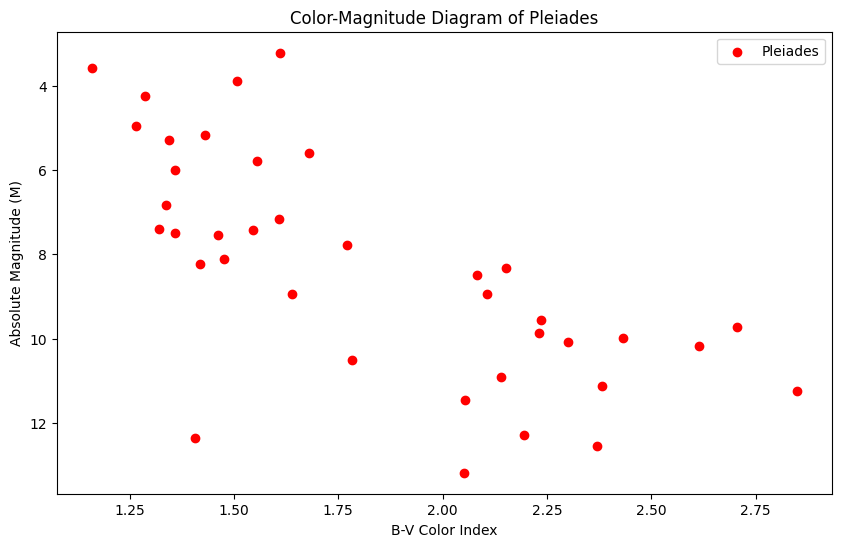

In [34]:
hyades_temperature,hyades_luminosity,hyades_abs_mag,hyades_b_v =vot('Hyades',120)
pleiades_temperature,pleiades_luminosity,pleiades_abs_mag,pleiades_b_v =vot('Hyades',120)
plot_HR(hyades_temperature,hyades_luminosity,"Hyades")
plot_HR(pleiades_temperature,pleiades_luminosity,"Pleiades")
# Plot Color-Magnitude Diagram (B-V vs Absolute Magnitude)
plot_CM(hyades_b_v,hyades_abs_mag,"Hyades")
plot_CM(pleiades_b_v,pleiades_abs_mag,"Pleiades")